In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
import string
import re
import gzip
import collections
from nltk.corpus import stopwords
%matplotlib inline

In [41]:
FILE_PATH = "/Users/siva/Documents/CS506/datasets/customer_review_data/reviews_all.txt"

In [44]:
reviews = {"positive":[],"negative":[]}
regex = re.compile('[%s]' % re.escape(string.punctuation))
with open(FILE_PATH,"r") as f:
    for line in f:
        temp = line.strip()
        if "]" in temp:
            if temp.split("]")[0][-2] != "[":
                if len(temp.split("##"))>1:
                    if temp.split("]")[0][-2] == "+":
                        reviews["positive"].append(regex.sub("",temp.split("##")[1]))
                    else:
                        reviews["negative"].append(regex.sub("",temp.split("##")[1]))

In [45]:
positive_words = []
negative_words = []
stop_words = set(stopwords.words("english"))
for each in reviews["positive"]:
    for w in each.split(" "):
        if w not in stop_words and w != "":
            positive_words.append(w)
for each in reviews["negative"]:
    for w in each.split(" ") :
        if w not in stop_words and w != "":
            negative_words.append(w)

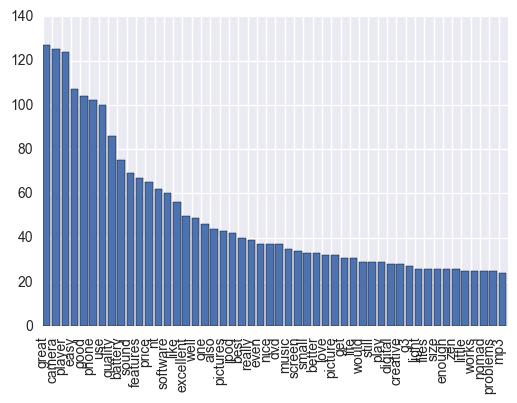

In [59]:
most_common_positive = np.array(collections.Counter(positive_words).most_common(50))
_ = plt.bar(np.arange(len(most_common_positive)),[int(e) for e in most_common_positive[:,1]])
_ = plt.xticks(np.arange(len(most_common_positive)),most_common_positive[:,0],rotation = "vertical")

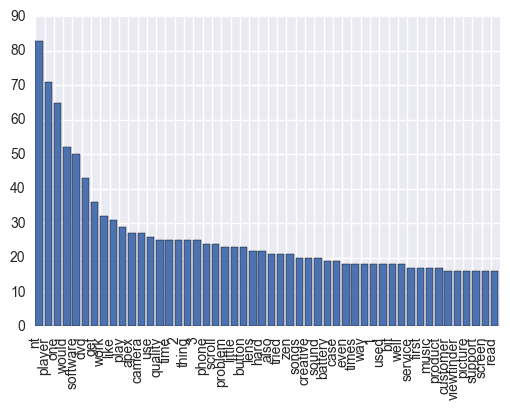

In [60]:
most_common_negative = np.array(collections.Counter(negative_words).most_common(50))
_ = plt.bar(np.arange(len(most_common_negative)),[int(e) for e in most_common_negative[:,1]])
_ = plt.xticks(np.arange(len(most_common_negative)),most_common_negative[:,0],rotation = "vertical")

In [4]:
#amazon data
AMAZON_DATA_FILE_PATH = "/Users/siva/Documents/CS506/datasets/Books_5.json"
def parse(path):
    g = open(path, 'r')
    for l in g:
        yield eval(l)

In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/siva/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [82]:
amazon_books_reviews = {}
r = re.compile(r'[a-zA-Z]*')
regex = re.compile('[%s]' % re.escape(string.punctuation))
for i,l in enumerate(parse(AMAZON_DATA_FILE_PATH)):
    review = l["reviewText"].lower()
    stop_words = set(stopwords.words("english"))
    review = [e for e in r.findall(review) if e not in stop_words and e != ""]
    review = [e[0] for e in nltk.pos_tag(review) if e[1] != "NOUN" or e[1] != "VERB"]
    if l["overall"] not in amazon_books_reviews:
        amazon_books_reviews[l["overall"]] = []
        amazon_books_reviews[l["overall"]] += (review)
    else:
        amazon_books_reviews[l["overall"]] += (review)
    if i%1000 == 0:
        print(i)
    if i%50000 == 0 and i!= 0:
        break

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


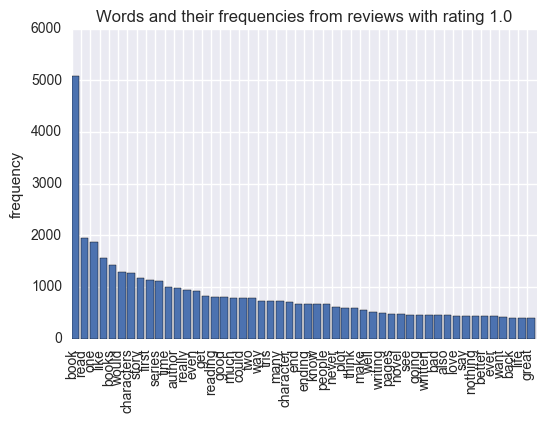

In [91]:
most_common_negative = np.array(collections.Counter(amazon_books_reviews[1.0]).most_common(50))
_ = plt.bar(np.arange(len(most_common_negative)),[int(e) for e in most_common_negative[:,1]])
_ = plt.xticks(np.arange(len(most_common_negative)),most_common_negative[:,0],rotation = "vertical")
_ = plt.ylabel("frequency")
_ = plt.title("Words and their frequencies from reviews with rating 1.0")
_ = plt.savefig("rating_one.png",bbox_inches='tight')

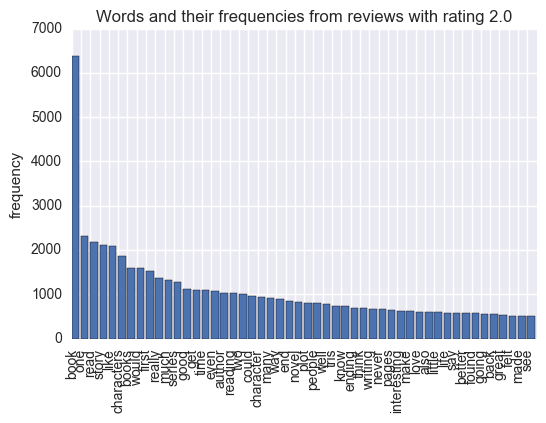

In [93]:
most_common_negative = np.array(collections.Counter(amazon_books_reviews[2.0]).most_common(50))
_ = plt.bar(np.arange(len(most_common_negative)),[int(e) for e in most_common_negative[:,1]])
_ = plt.xticks(np.arange(len(most_common_negative)),most_common_negative[:,0],rotation = "vertical")
_ = plt.ylabel("frequency")
_ = plt.title("Words and their frequencies from reviews with rating 2.0")
_ = plt.savefig("rating_two.png",bbox_inches='tight')

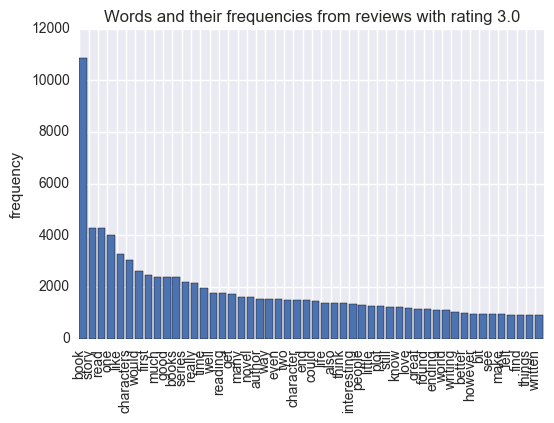

In [94]:
most_common_negative = np.array(collections.Counter(amazon_books_reviews[3.0]).most_common(50))
_ = plt.bar(np.arange(len(most_common_negative)),[int(e) for e in most_common_negative[:,1]])
_ = plt.xticks(np.arange(len(most_common_negative)),most_common_negative[:,0],rotation = "vertical")
_ = plt.ylabel("frequency")
_ = plt.title("Words and their frequencies from reviews with rating 3.0")
_ = plt.savefig("rating_three.png",bbox_inches='tight')

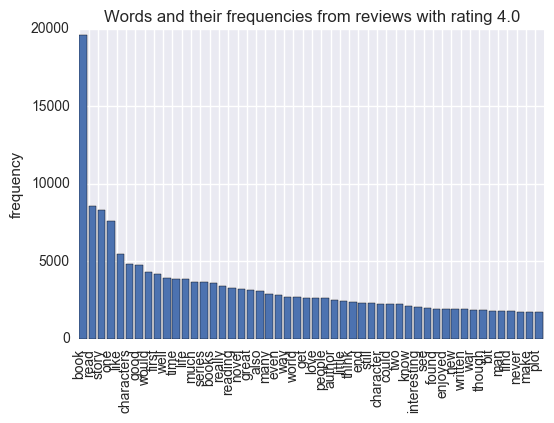

In [95]:
most_common_negative = np.array(collections.Counter(amazon_books_reviews[4.0]).most_common(50))
_ = plt.bar(np.arange(len(most_common_negative)),[int(e) for e in most_common_negative[:,1]])
_ = plt.xticks(np.arange(len(most_common_negative)),most_common_negative[:,0],rotation = "vertical")
_ = plt.ylabel("frequency")
_ = plt.title("Words and their frequencies from reviews with rating 4.0")
_ = plt.savefig("rating_four.png",bbox_inches='tight')

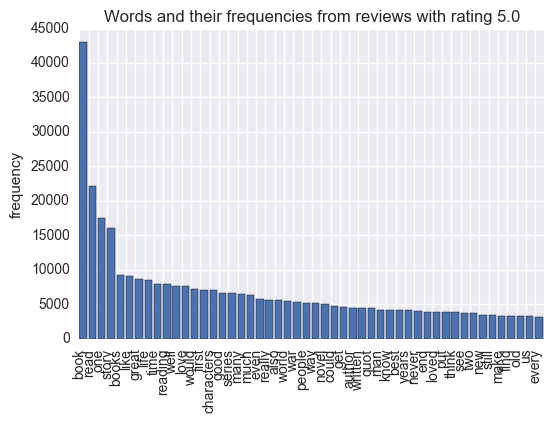

In [96]:
most_common_negative = np.array(collections.Counter(amazon_books_reviews[5.0]).most_common(50))
_ = plt.bar(np.arange(len(most_common_negative)),[int(e) for e in most_common_negative[:,1]])
_ = plt.xticks(np.arange(len(most_common_negative)),most_common_negative[:,0],rotation = "vertical")
_ = plt.ylabel("frequency")
_ = plt.title("Words and their frequencies from reviews with rating 5.0")
_ = plt.savefig("rating_five.png",bbox_inches='tight')